In [9]:
!pip install mysql-connector-python

In [10]:
import mysql.connector
import pandas as pd

In [11]:
conn = mysql.connector.connect(host = '127.0.0.1', database='terpbuy',user='uliana', password='uliana123')

In [12]:
df_prd_by_dept = pd.read_sql('select count(prd.product_id) as number_of_product, dep.department_name from terpbuy.product as prd inner join terpbuy.department as dep on dep.department_id = prd.department_id group by dep.department_name order by dep.department_name', conn,index_col = 'department_name')
df_prd_by_dept

C:\Users\admin\AppData\Local\Temp\ipykernel_9272\2311603152.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prd_by_dept = pd.read_sql('select count(prd.product_id) as number_of_product, dep.department_name from terpbuy.product as prd inner join terpbuy.department as dep on dep.department_id = prd.department_id group by dep.department_name order by dep.department_name', conn,index_col = 'department_name')


,number_of_product
department_name,
Apparel,7
Book Shop,1
Discs Shop,4
Fan Shop,6
Fitness,7
Footwear,8
Golf,7
Health and Beauty,1
Outdoors,27


In [13]:
import matplotlib.pyplot as plt

### The most profitable for company is outdors category of products and they should concentrate on selling it more

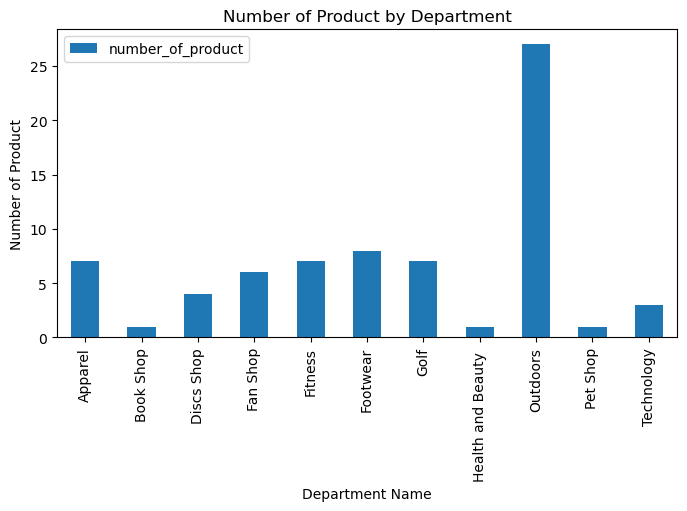

In [14]:
df_prd_by_dept.plot(kind = 'bar', figsize= (8,4))
plt.title('Number of Product by Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Product')
plt.show()

### The number of orders in 2021 and 2022 have decreased because of covid resons

In [15]:
df_ord_by_year = pd.read_sql('select count(*) as ord_count, year(order_date) as ord_year from terpbuy.orders group by ord_year having ord_count > 0', conn,index_col = 'ord_year')
df_ord_by_year

C:\Users\admin\AppData\Local\Temp\ipykernel_9272\3015843433.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ord_by_year = pd.read_sql('select count(*) as ord_count, year(order_date) as ord_year from terpbuy.orders group by ord_year having ord_count > 0', conn,index_col = 'ord_year')


,ord_count
ord_year,
2018,585
2019,708
2020,497
2021,362


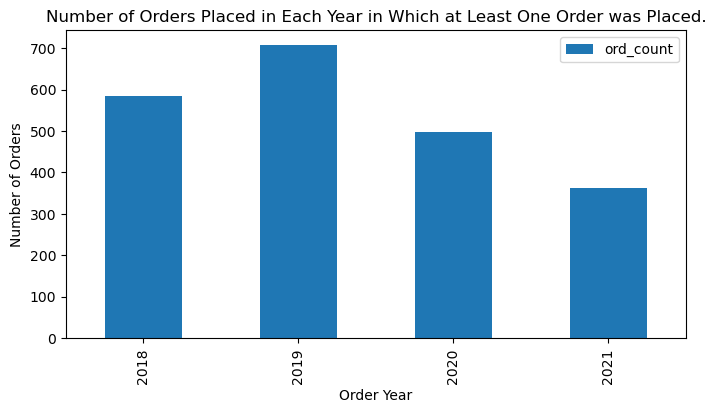

In [20]:
df_ord_by_year.plot(kind = 'bar', figsize= (8,4))
plt.title('Number of Orders Placed in Each Year in Which at Least One Order was Placed.')
plt.xlabel('Order Year')
plt.ylabel('Number of Orders')
plt.show()